In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import rc
from scipy.stats import ttest_rel

In [2]:
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)
sns.set_style('white')

In [3]:
results_dir = '../../../../evaluation/outputs/csv'
rq_a2_df = pd.read_csv(os.path.join(results_dir, 'rq_a2_gradient_masking.csv'))
rq_b_df = pd.read_csv(os.path.join(results_dir, 'rq_b_gradient_masking.csv'))

In [69]:
rq_a2_df = rq_a2_df[~rq_a2_df.eval_name.str.contains('duplication')]
rq_b_df = rq_b_df[~rq_b_df.eval_name.str.contains('duplication')]

In [70]:
rq_a2_df_masked = rq_a2_df[rq_a2_df.is_masked]
rq_a2_df_masked.loc[:, 'eval_name'] = rq_a2_df_masked.eval_name.str.replace('_2', '')
rq_a2_df_masked = rq_a2_df_masked.drop(columns=['is_masked', 'is_contaminated'])
rq_a2_df_masked = rq_a2_df_masked.set_index(['eval_name', 'composer_type'])

rq_a2_df_full = rq_a2_df[~rq_a2_df.is_masked]
rq_a2_df_full = rq_a2_df_full.drop(columns=['is_masked', 'is_contaminated'])
rq_a2_df_full = rq_a2_df_full.set_index(['eval_name', 'composer_type'])

assert all(rq_a2_df_masked.index == rq_a2_df_full.index)

In [71]:
rq_b_df_masked = rq_b_df[rq_b_df.is_masked]
rq_b_df_masked.loc[:, 'eval_name'] = rq_b_df_masked.eval_name.str.replace('_2', '')
rq_b_df_masked = rq_b_df_masked.drop(columns=['is_masked', 'is_contaminated'])
rq_b_df_masked = rq_b_df_masked.set_index(['eval_name', 'composer_type'])

rq_b_df_full = rq_b_df[~rq_b_df.is_masked]
rq_b_df_full = rq_b_df_full.drop(columns=['is_masked', 'is_contaminated'])
rq_b_df_full = rq_b_df_full.set_index(['eval_name', 'composer_type'])

assert all(rq_b_df_masked.index == rq_b_df_full.index)

In [95]:
masked_ems = np.concatenate([rq_a2_df_masked.values.flatten(), rq_b_df_masked.values.flatten()]) * 100
full_ems = np.concatenate([rq_a2_df_full.values.flatten(), rq_b_df_full.values.flatten()]) * 100
deltas = masked_ems - full_ems

In [96]:
ttest_rel(masked_ems, full_ems, alternative='less')

TtestResult(statistic=np.float64(-4.306031970891044), pvalue=np.float64(1.900573508685745e-05), df=np.int64(103))

In [97]:
abs(deltas).max(), deltas.mean()

(np.float64(3.044315992292873), np.float64(-0.3514593132684269))

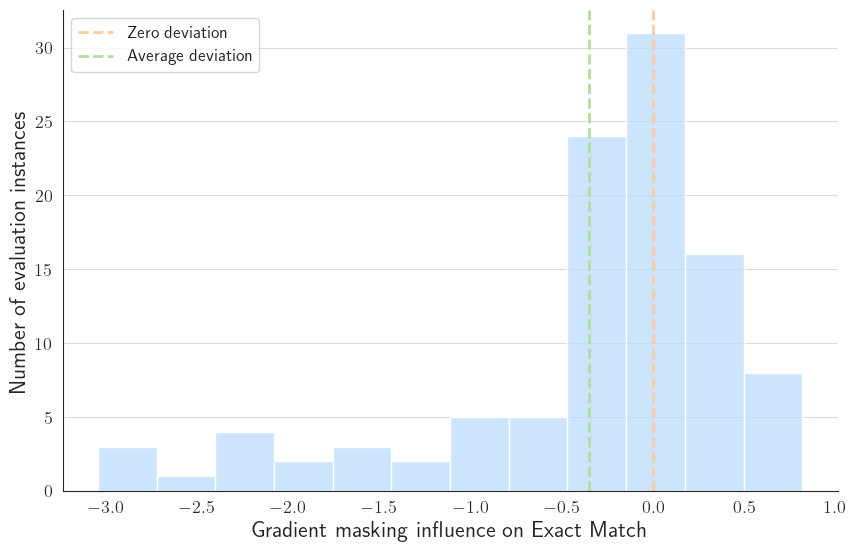

In [100]:
_, ax = plt.subplots(figsize=(10, 6.25))

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

sns.histplot(deltas,
             bins=12,
             color='#bcdcfc',
             ax=ax)
ax.set_xlabel('Gradient masking influence on Exact Match', fontsize=16)
ax.set_ylabel('Number of evaluation instances', fontsize=16)
zero_line = ax.axvline(x=0, color='#fccc9c', linestyle='--', linewidth=2)
mean_line = ax.axvline(x=deltas.mean(), color='#b1dd9f', linestyle='--', linewidth=2)
ax.legend([zero_line, mean_line], ['Zero deviation', 'Average deviation'], loc='upper left', fontsize=12.5)

ax.grid(axis='y', alpha=0.7)
ax.tick_params(axis='both', labelsize=13)

plt.savefig('gradient-masking.png', dpi=300, bbox_inches='tight')
plt.savefig('gradient-masking.svg', format='svg', bbox_inches='tight')